**PROJECT 2: IMAGE PROCESSING**
* **MSSV:** 21127511
* **Họ tên:** NGUYỄN QUỐC HUY
* **Lớp:** 21CLC02

#### Import library

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time 

#### Brightness

In [2]:
def brightness(image):
    # Tăng độ sáng lên 30
    adjust_img = image.astype(np.int32) + 30

    # Giới hạn giá trị của các phần tử từ 0 đến 255
    new_img_clip = np.clip(adjust_img, 0, 255)

    result = Image.fromarray(new_img_clip.astype(np.uint8))

    return result

#### Contrast

In [3]:
def contrast(image):
    # Thay đổi độ tương phản bằng cách nhân giá trị contrast vào mỗi pixel
    adjust_img = image.astype(np.int32) * 1.7
    # Giới hạn giá trị của các phần tử từ 0 đến 255
    new_img_clip = np.clip(adjust_img, 0, 255)
    # Chuyển đổi mảng numpy thành ảnh PIL
    result = Image.fromarray(new_img_clip.astype(np.uint8))
    return result

#### Flip image

In [4]:
def flip_image(image, mode):
    # Lật ảnh theo mode
    if mode == "vertical":
        result = image[::-1]
    elif mode == "horizontal":
        result = image[:, ::-1]    
    else:
        result = image[::-1]
    result = Image.fromarray(result.astype(np.uint8))
    return result

#### Grayscale

In [5]:
def grayscale(image):
    # Chuyển đổi ảnh thành ảnh xám

    luminosity_constant = [0.3, 0.59, 0.11]

    grayscale_image = np.dot(image[..., :3], luminosity_constant)
    
    return Image.fromarray(grayscale_image.astype(np.uint8))

#### Sepia

In [6]:
def sepia(image):
    # Chuyển đổi ảnh thành ảnh sepia
    
    red = image[:, :, 0:1]
    green = image[:, :, 1:2]
    blue = image[:, :, 2:3]

    tr = 0.393 * red  + 0.769 * green + 0.189 * blue
    tg = 0.349 * red  + 0.686 * green + 0.168 * blue
    tb = 0.272 * red  + 0.534 * green + 0.131 * blue

    sepia_image = np.append(np.append(tr, tg, axis = 2),tb, axis = 2)
    sepia_image = np.clip(sepia_image, 0, 255)
    
    return Image.fromarray(sepia_image.astype(np.uint8))

#### Blur

In [7]:
def blur(image):
    # Gaussian kernel 3x3
    kernel = np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]], dtype=np.float32) / 16

    # Get image shape
    height, width, channels = image.shape

    # Create a padded copy of the image
    padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='edge')

    # Create an output image to store the blurred result (use float32 dtype)
    blurred_image = np.zeros_like(image, dtype=np.float32)

    # Perform convolution using array operations
    for c in range(channels):
        for i in range(3):
            for j in range(3):
                blurred_image[:, :, c] += padded_image[i:i + height, j:j + width, c] * kernel[i, j]

    # Clip the pixel values to the range [0, 255] and convert to uint8
    blurred_image = np.clip(blurred_image, 0, 255)
    result = Image.fromarray(blurred_image.astype(np.uint8))

    return result


#### Sharpen

In [8]:
def sharpen(image):

    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]], dtype=np.float32)

    # Get image shape
    height, width, channels = image.shape

    # Create a padded copy of the image
    padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='edge')

    # Create an output image to store the blurred result (use float32 dtype)
    sharp_image = np.zeros_like(image, dtype=np.float32)

    # Perform convolution using array operations (no need for explicit loops)
    for c in range(channels):
        for i in range(3):
            for j in range(3):
                sharp_image [:, :, c] += padded_image[i:i + height, j:j + width, c] * kernel[i, j]

    # Clip the pixel values to the range [0, 255] and convert to uint8
    sharp_image  = np.clip(sharp_image , 0, 255)
    result = Image.fromarray(sharp_image.astype(np.uint8))

    return result

#### Crop

In [9]:
def crop(image):
    # Chuyển ảnh sang mảng numpy
    img_array = np.array(image)
    size = 256

    # Lấy kích thước ảnh
    height, width, _ = img_array.shape

    # Tính toán tọa độ cắt
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size

    # Cắt ảnh bằng NumPy slicing
    cropped_img_array = img_array[top:bottom, left:right, :]

    # Tạo ảnh mới từ mảng numpy đã cắt
    result = Image.fromarray(cropped_img_array)

    return result


#### Circle crop

In [10]:
def circle_crop(image):
    # Tạo mask tròn
    height, width, _ = image.shape
    x_center, y_center = width // 2, height // 2
    y, x = np.ogrid[:height, :width]
    mask = (x - x_center)**2 + (y - y_center)**2 <= (min(width, height) // 2)**2

    # Áp dụng mask lên ảnh
    masked_img_array = np.zeros_like(image)
    masked_img_array[mask] = image[mask]

    # Tạo ảnh mới từ mảng numpy đã mask
    masked_image = Image.fromarray(masked_img_array)

    return masked_image



#### Ellipse crop

In [11]:
def ellipse_crop(image):
    result = np.array(image)
    center = np.array([image.shape[0] / 2, image.shape[1] / 2])
    a = min(image.shape[0], image.shape[1]) / (2* np.sqrt(2))
    b = np.sqrt((min(image.shape[0], image.shape[1])/2)**2 + a**2)

    y, x = np.ogrid[:image.shape[0], :image.shape[1]]

    x_centered = x - center[1]
    y_centered = y - center[0]

    ellipse_1 = ((x_centered * np.cos(3 * np.pi / 4) + y_centered * np.sin(3 * np.pi / 4)) ** 2) / (a ** 2) + ((x_centered * np.sin(3 * np.pi / 4) - y_centered * np.cos(3 * np.pi / 4)) ** 2) / (b ** 2)
    ellipse_2 = ((x_centered * np.cos(np.pi / 4) + y_centered * np.sin(np.pi / 4)) ** 2) / (a ** 2) + ((x_centered * np.sin(np.pi / 4) - y_centered * np.cos(np.pi / 4)) ** 2) / (b ** 2)

    result[(ellipse_1 > 1) & (ellipse_2 > 1) ] = [0, 0, 0]

    result = Image.fromarray(result)
    return result


#### Other functions

In [12]:
def get_output_filename(input_file, func):
    # Tìm vị trí của dấu chấm (.) cuối cùng trong tên file
    last_dot_index = input_file.rfind(".")
    
    # Tách phần tên file và phần mở rộng (extension) từ vị trí tìm được
    filename = input_file[:last_dot_index]
    ext = input_file[last_dot_index:]
    
    # Tạo tên file mới với từ khóa func được thêm vào
    output_filename = f"{filename}_{func}{ext}"
    
    return output_filename

In [13]:
def show_image(image, adjusted_image, func1, another_image = None, func2 = None):
    # Hiển thị ảnh gốc, ảnh được chỉnh và ảnh khác
    if another_image == None and func2 == None:
        fig, axs = plt.subplots(1, 2, figsize=(14, 7))
        
        axs[0].set_title("Original Image")
        axs[0].imshow(image)
        axs[0].axis('off')
        
        axs[1].set_title(func1 + " Image")
        axs[1].imshow(adjusted_image, 'gray')
        axs[1].axis('off')
    
    else:
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))
        
        axs[0].set_title("Original Image")
        axs[0].imshow(image)
        axs[0].axis('off')
        
        axs[1].set_title(func1 + " Image")
        axs[1].imshow(adjusted_image, 'gray')
        axs[1].axis('off')
        
        axs[2].set_title(func2 + " Image")
        axs[2].imshow(another_image, 'gray')
        axs[2].axis('off')
    
    plt.show()

In [14]:
def show_gallery(image_list):
    num_images = len(image_list)
    rows = 4
    cols = 3
    title_list = ['Original', 'bright', 
                  'contrast', 'flip_horizontal', 
                  'flip_vertical', 'grayscale', 
                  'sepia', 'blur', 
                  'sharp', 'crop', 
                  'circle crop', 'ellipse_crop']

    fig, axs = plt.subplots(rows, cols, figsize=(10, 20))

    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            if idx < num_images:
                axs[i][j].set_title(title_list[idx] + " Image")
                axs[i][j].imshow(image_list[idx], "gray")
                axs[i][j].axis('off')

    plt.tight_layout()
    plt.show()

In [15]:
def save_image(adjust_image, image_file, func):
    output_name = get_output_filename(image_file, func)
    adjust_image.save(output_name)

In [16]:
def image_handler(image_file, func = 0):
    image = np.array(Image.open(image_file))
    start_time = time.time()
    
    if func == 1:
        adjust_image = brightness(image)
        end_time = time.time()
        print('Run time bright: ', end_time - start_time)
        save_image(adjust_image, image_file, "bright")

        show_image(image, adjust_image, "Bright")
    if func == 2:
        adjust_image = contrast(image)
        end_time = time.time()
        print('Run time contrast: ', end_time - start_time)
        save_image(adjust_image, image_file, "contrast")

        show_image(image, adjust_image, "Contrast")
    if func == 3:
        adjust_image = flip_image(image, "horizontal")
        end_time = time.time()
        print('Run time flip horizontal: ', end_time - start_time)
        save_image(adjust_image, image_file, "flip_horizontal")

        start_time = time.time()
        adjust_image2 = flip_image(image, "vertical")
        end_time = time.time()
        print('Run time flip vertical: ', end_time - start_time)
        save_image(adjust_image2, image_file, "flip_vertical")

        show_image(image, adjust_image, "Flip_horizontal", adjust_image2, "Flip_vertical")
    if func == 4:
        adjust_image = grayscale(image)
        end_time = time.time()
        print('Run time grayscale: ', end_time - start_time)
        save_image(adjust_image, image_file, "grayscale")

        start_time = time.time()
        adjust_image2 = sepia(image)
        end_time = time.time()
        print('Run time sepia: ', end_time - start_time)
        save_image(adjust_image2, image_file, "sepia")
        
        show_image(image, adjust_image, "Grayscale", adjust_image2, "Sepia")
    if func == 5:
        adjust_image = blur(image)
        end_time = time.time()
        print('Run time blur: ', end_time - start_time)
        save_image(adjust_image, image_file, "blur")

        start_time = time.time()
        adjust_image2 = sharpen(image)
        end_time = time.time()
        print('Run time sharpen: ', end_time - start_time)
        save_image(adjust_image2, image_file, "sharpen")

        show_image(image, adjust_image, "Blur", adjust_image2, "Sharpen")
    if func == 6:
        adjust_image = crop(image)
        end_time = time.time()
        print('Run time crop: ', end_time - start_time)
        save_image(adjust_image, image_file, "crop")

        show_image(image, adjust_image, "crop")
    if func == 7:
        adjust_image = circle_crop(image)
        end_time = time.time()
        print('Run time circle crop: ', end_time - start_time)
        save_image(adjust_image, image_file, "circle_crop")

        show_image(image, adjust_image, "Circle_crop")
    if func == 8:
        adjust_image = ellipse_crop(image)
        end_time = time.time()
        print('Run time ellipse crop: ', end_time - start_time)
        save_image(adjust_image, image_file, "ellipse_crop")
        
        show_image(image, adjust_image, "Ellipse_crop")
    if func == 0:
        start_time = time.time()
        bright_image = brightness(image)
        end_time = time.time()            
        bright_time = end_time - start_time
        start_time = time.time()
        contrast_image = contrast(image)
        end_time = time.time()            
        contrast_time = end_time - start_time
        start_time = time.time()
        horizontal_image = flip_image(image, "horizontal")
        end_time = time.time()            
        horizontal_time = end_time - start_time
        start_time = time.time()
        vertical_image = flip_image(image, "vertical")
        end_time = time.time()            
        vertical_time = end_time - start_time
        start_time = time.time()
        gray_image = grayscale(image)
        end_time = time.time()            
        grayscale_time = end_time - start_time
        start_time = time.time()
        sepia_image = sepia(image)
        end_time = time.time()            
        sepia_time = end_time - start_time
        start_time = time.time()
        blur_image = blur(image)
        end_time = time.time()            
        blur_time = end_time - start_time
        start_time = time.time()
        sharp_image = sharpen(image)
        end_time = time.time()            
        sharp_time = end_time - start_time
        start_time = time.time()
        crop_image = crop(image)
        end_time = time.time()            
        crop_time = end_time - start_time
        start_time = time.time()
        circle_crop_image = circle_crop(image)
        end_time = time.time()            
        circle_crop_time = end_time - start_time
        start_time = time.time()
        ellipse_crop_image = ellipse_crop(image)
        end_time = time.time()            
        ellipse_crop_time = end_time - start_time
        print('Run time bright: ', bright_time)
        print('Run time contrast: ', contrast_time)
        print('Run time horizontal: ', horizontal_time)
        print('Run time vertical: ', vertical_time)
        print('Run time grayscale: ', grayscale_time)
        print('Run time sepia: ', sepia_time)
        print('Run time blur: ', blur_time)
        print('Run time sharp: ', sharp_time)
        print('Run time crop: ', crop_time)
        print('Run time circle_crop: ', circle_crop_time)
        print('Run time ellipse_crop: ', ellipse_crop_time)
        # print('Total run time: ', )

        image_list = [image, bright_image, 
                      contrast_image, horizontal_image, 
                      vertical_image, gray_image, 
                      sepia_image, blur_image,
                      sharp_image, crop_image,
                      circle_crop_image, ellipse_crop_image]
        show_gallery(image_list)


        save_image(bright_image, image_file, "bright")
        save_image(contrast_image, image_file, "contrast")
        save_image(horizontal_image, image_file, "flip_horizontal")
        save_image(vertical_image, image_file, "flip_vertical")
        save_image(gray_image, image_file, "grayscale")
        save_image(sepia_image, image_file, "sepia")
        save_image(blur_image, image_file, "blur")
        save_image(sharp_image, image_file, "sharpen")
        save_image(crop_image, image_file, "crop")
        save_image(circle_crop_image, image_file, "circle_crop")
        save_image(ellipse_crop_image, image_file, "ellipse_crop")


#### Main

In [17]:
def main():
    image_file = input("Enter image: ")
    func = int(input("Enter option (from 0 to 8): "))
    image_handler(image_file, func)

Run time bright:  0.009927749633789062
Run time contrast:  0.026926040649414062
Run time horizontal:  0.004988431930541992
Run time vertical:  0.00500178337097168
Run time grayscale:  0.02393031120300293
Run time sepia:  0.06680846214294434
Run time blur:  0.09774470329284668
Run time sharp:  0.08829426765441895
Run time crop:  0.0029926300048828125
Run time circle_crop:  0.036901235580444336
Run time ellipse_crop:  0.03841137886047363


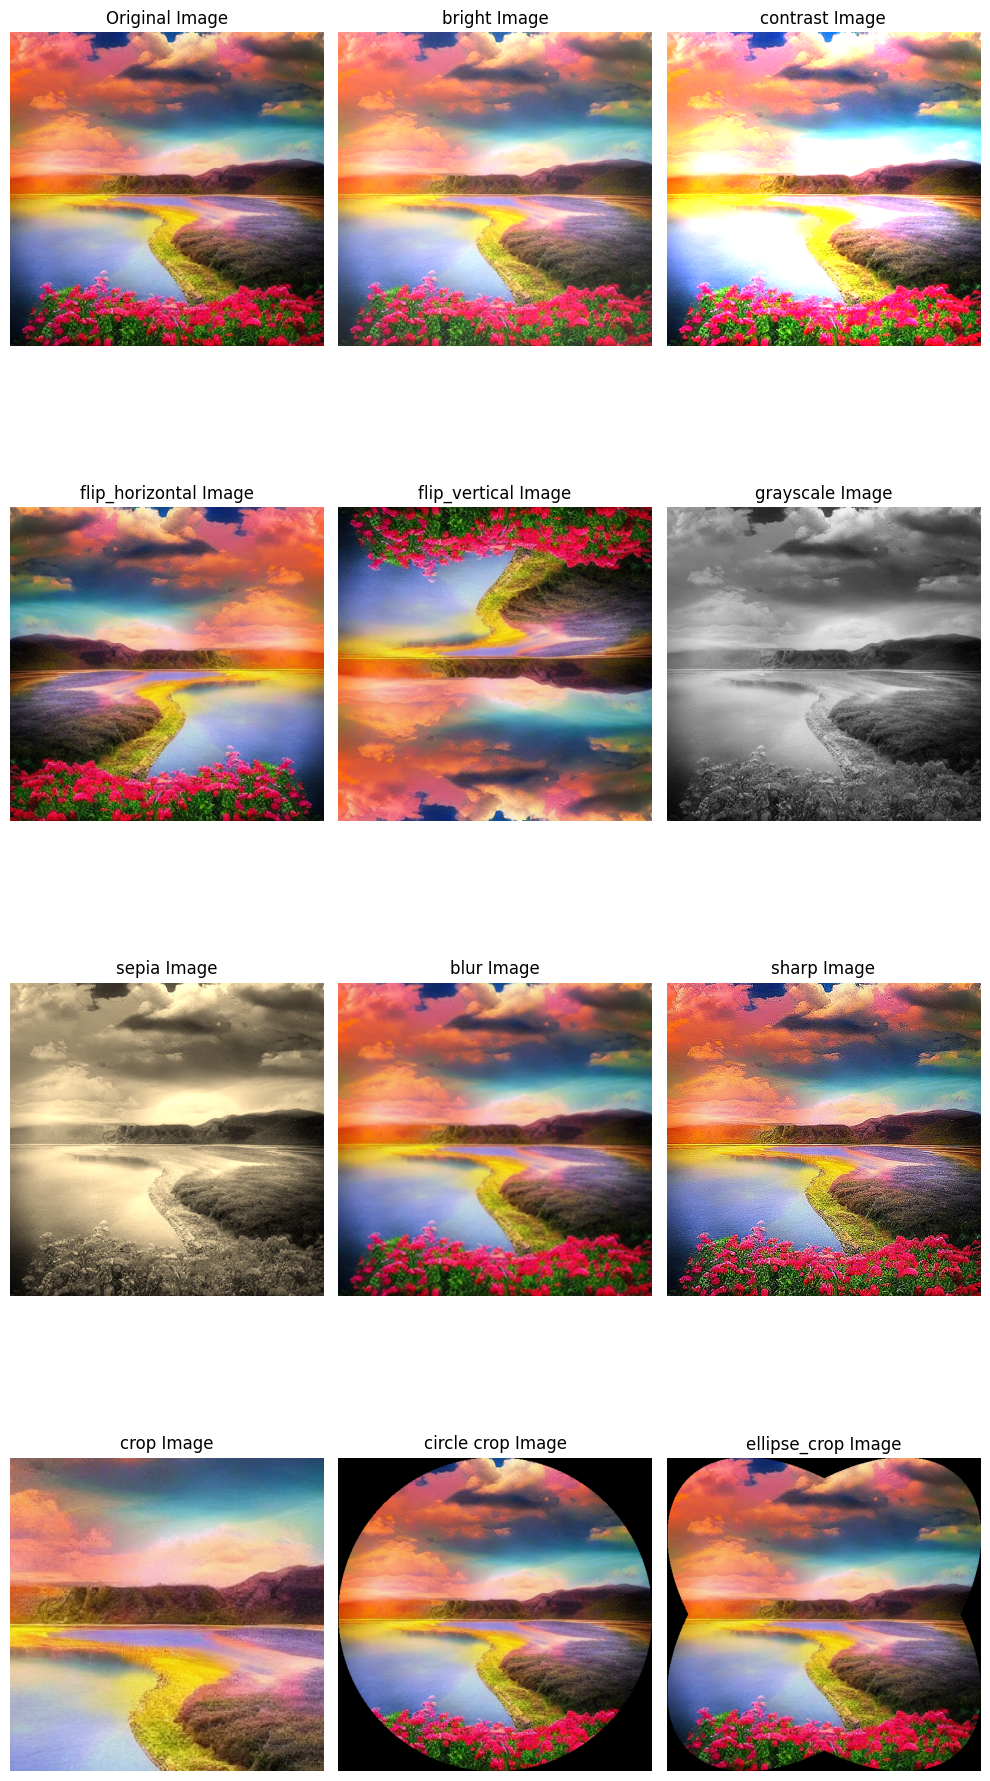

In [18]:
if __name__ == "__main__":
    main()